--2025-01-28 21:30:55--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip [following]
--2025-01-28 21:30:55--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip [following]
--2025-01-28 21:30:56--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip
Resolving raw.githubusercontent.com (raw.githubuserco

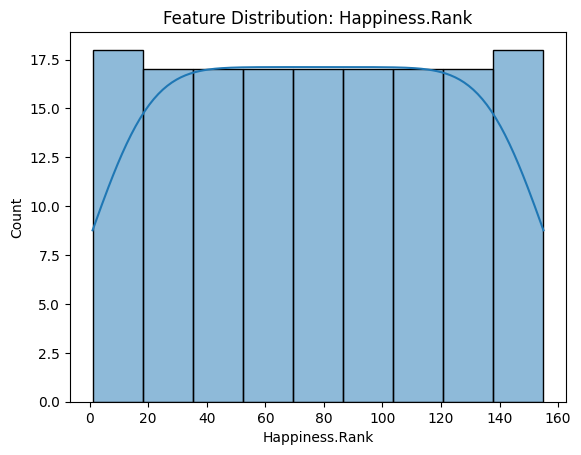

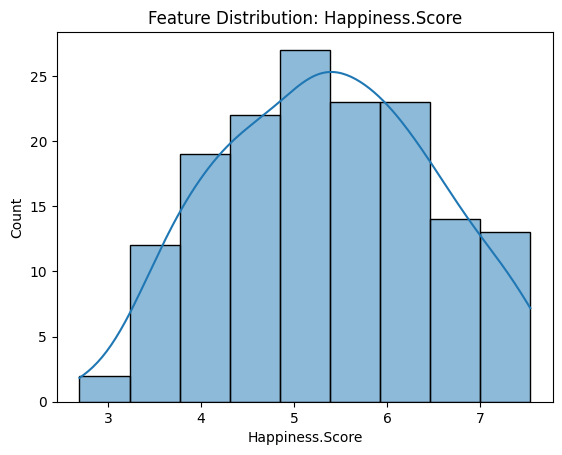

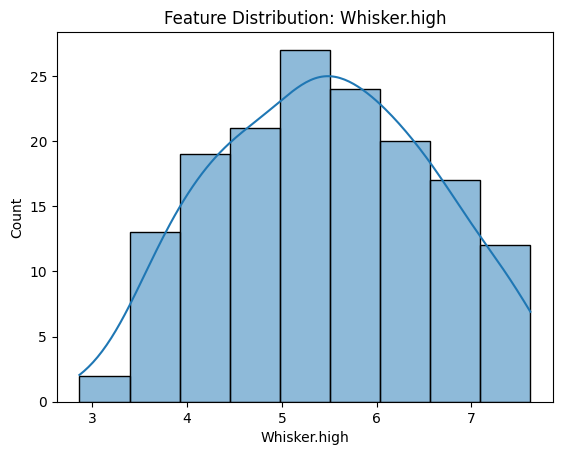

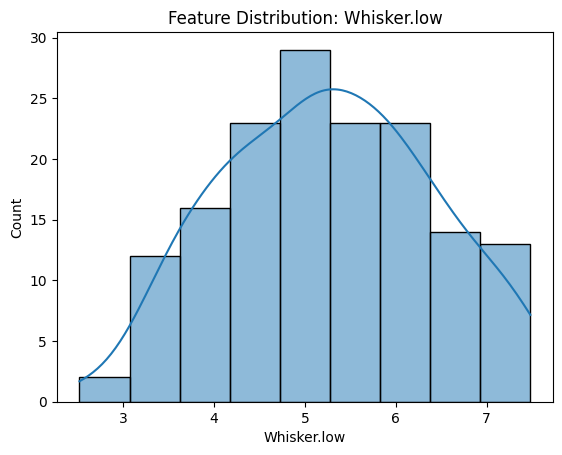

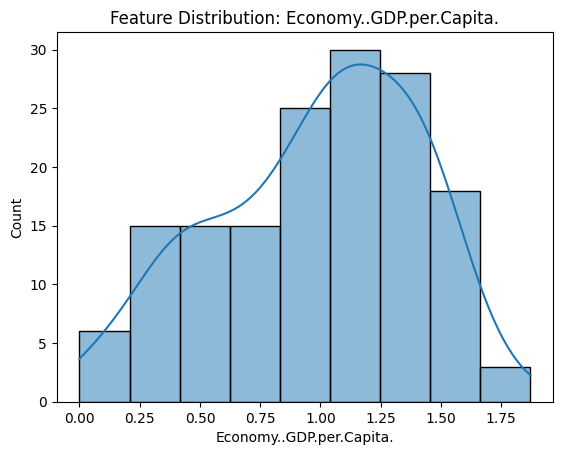

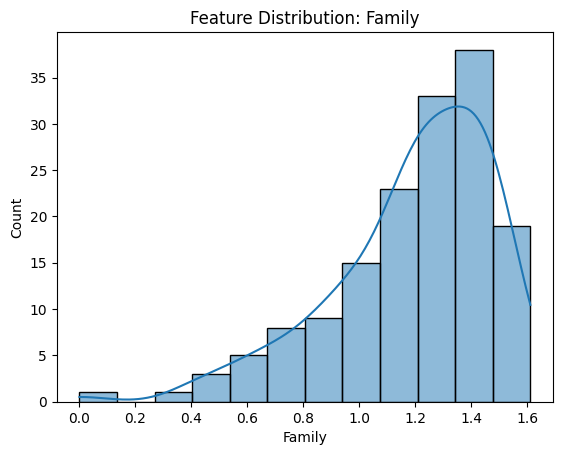

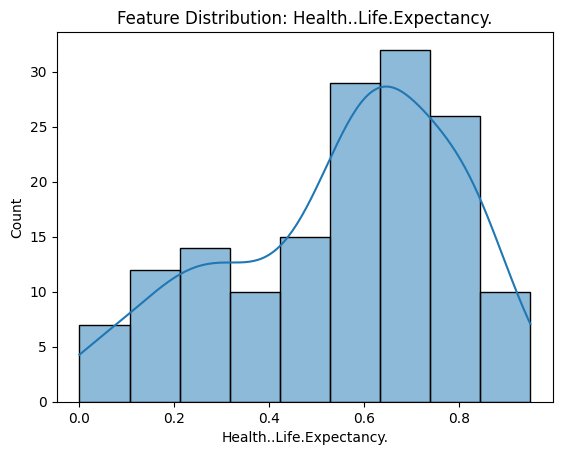

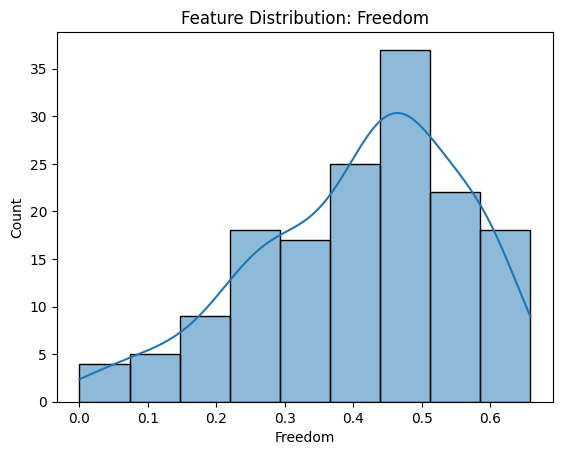

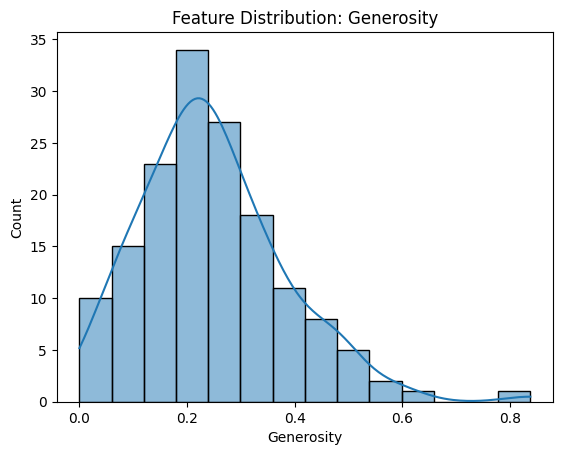

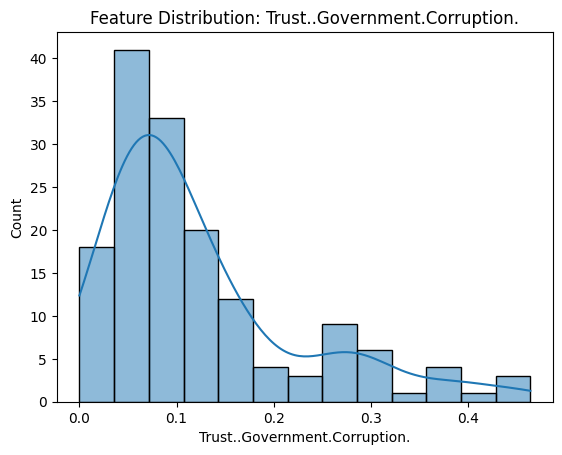

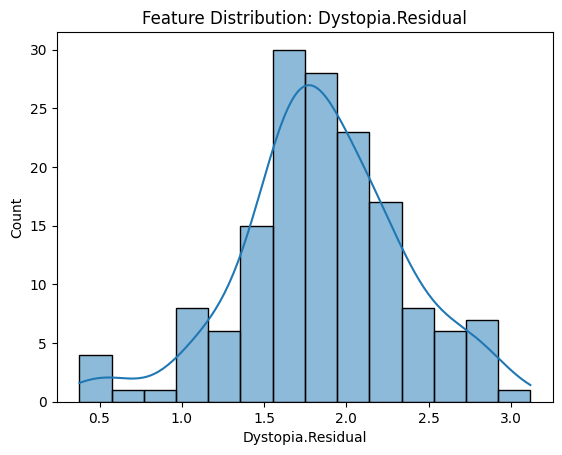

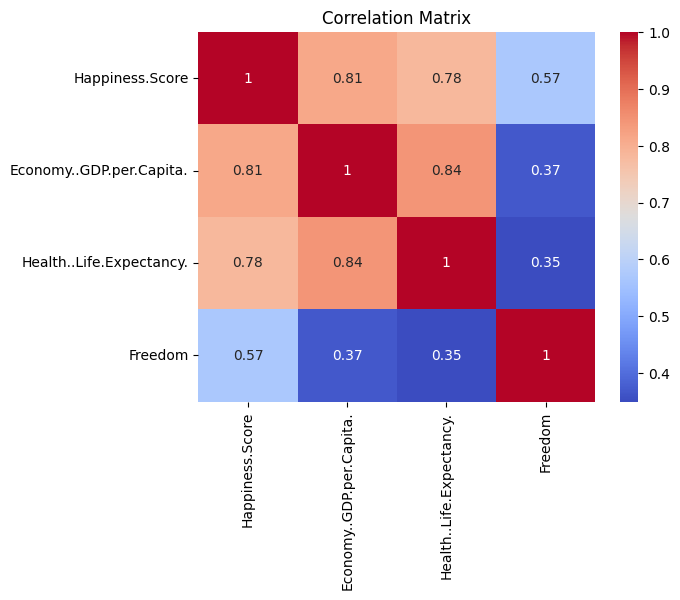

The correlation matrix shows that features have varying strengths of linear relationships.



Standardized Data:
       Happiness.Score  Economy..GDP.per.Capita.  Health..Life.Expectancy.  \
count     1.550000e+02              1.550000e+02              1.550000e+02   
mean     -2.750488e-16             -2.750488e-16             -2.292073e-16   
std       1.003241e+00              1.003241e+00              1.003241e+00   
min      -2.359949e+00             -2.347736e+00             -2.333157e+00   
25%      -7.525169e-01             -7.661470e-01             -7.679616e-01   
50%      -6.653176e-02              1.903992e-01              2.314821e-01   
75%       6.629099e-01              7.946657e-01              7.264573e-01   
max       1.935996e+00              2.112488e+00              1.684893e+00   

            Freedom  
count  1.550000e+02  
mean   2.750488e-16  
std    1.003241e+00  
min   -2.734123e+00  
25%   -7.030094e-01  
50%    1.917450e-01  
75%    7.208448e-01  
max    1.668506e+00  

Original Data Statistics:
       Happiness.Score  Economy..GDP.per.Capita.  He

=== Conclusions ===

1. Data Preprocessing:
After loading the data, we performed an initial analysis of types and statistics. The data contains numerical and categorical
features, which are well-suited for analysis and clustering. The distribution of numerical features revealed that not all of them
follow a normal distribution, making standardization necessary.

2. Correlation Analysis:
The correlation matrix indicates a strong relationship between the 'Happiness.Score' and features like 'Economy..GDP.per.Capita.'
and 'Health..Life.Expectancy.'. This is expected as economic conditions and population health are key factors for happiness levels.

3. Happiness Level Distribution Map:
The map showed the geographic distribution of happiness scores. Northern European countries demonstrate the highest scores,
while African countries have significantly lower values.

4. Data Standardization:
Standardization helped to scale numerical features evenly, which is critical for the GaussianMixture al

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.mixture import GaussianMixture

# Data download
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

# Checking file existence and extracting if necessary
if not os.path.exists("2015.csv") or not os.path.exists("2016.csv") or not os.path.exists("2017.csv") or not os.path.exists("2018.csv"):
    with zipfile.ZipFile("WorldHappinessReport.zip", 'r') as zip_ref:
        zip_ref.extractall()
else:
    print("Files already exist. Skipping extraction.")

# Loading a specific file
data = pd.read_csv("2017.csv")

# Data information
print("Data Information:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Visualizing numerical features' distribution
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.histplot(data[column], kde=True)
    plt.title(f"Feature Distribution: {column}")
    plt.show()

# Correlation matrix
selected_columns = ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom']
correlation_matrix = data[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Conclusion on feature relationships
print("The correlation matrix shows that features have varying strengths of linear relationships.")

# Visualization of target feature distribution
fig = px.choropleth(data,
                    locations="Country",
                    color="Happiness.Score",
                    locationmode="country names")
fig.update_layout(title="Happiness Index 2017")
fig.show()

# Data standardization
def data_scale(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()

    scaled_data = scaler.fit_transform(data)
    return scaled_data

original_dataframe = data[selected_columns]
data_scaled = data_scale(original_dataframe, scaler_type='std')
df_scaled = pd.DataFrame(data_scaled, columns=selected_columns)
print("\nStandardized Data:")
print(df_scaled.describe())

# Comparing statistics
print("\nOriginal Data Statistics:")
print(original_dataframe.describe())
print("\nStandardized Data Statistics:")
print(df_scaled.describe())

# Clustering model
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(data_scaled)
data['Cluster'] = clusters

# Cluster heatmap
fig = px.choropleth(data,
                    locations="Country",
                    color="Cluster",
                    locationmode="country names")
fig.update_layout(title="Country Clusters Distribution")
fig.show()

# Influence of additional features
additional_columns = ['Generosity', 'Trust..Government.Corruption.']
selected_columns_with_additional = selected_columns + additional_columns
data_scaled_with_additional = data_scale(data[selected_columns_with_additional], scaler_type='std')
clusters_with_additional = gmm.fit_predict(data_scaled_with_additional)
data['Cluster_with_additional'] = clusters_with_additional

# Second heatmap
fig = px.choropleth(data,
                    locations="Country",
                    color="Cluster_with_additional",
                    locationmode="country names")
fig.update_layout(title="Country Clusters with Additional Features")
fig.show()

# Conclusions
print("=== Conclusions ===\n")

print("1. Data Preprocessing:")
print("After loading the data, we performed an initial analysis of types and statistics. The data contains numerical and categorical")
print("features, which are well-suited for analysis and clustering. The distribution of numerical features revealed that not all of them")
print("follow a normal distribution, making standardization necessary.\n")

print("2. Correlation Analysis:")
print("The correlation matrix indicates a strong relationship between the 'Happiness.Score' and features like 'Economy..GDP.per.Capita.'")
print("and 'Health..Life.Expectancy.'. This is expected as economic conditions and population health are key factors for happiness levels.\n")

print("3. Happiness Level Distribution Map:")
print("The map showed the geographic distribution of happiness scores. Northern European countries demonstrate the highest scores,")
print("while African countries have significantly lower values.\n")

print("4. Data Standardization:")
print("Standardization helped to scale numerical features evenly, which is critical for the GaussianMixture algorithm. Comparing the")
print("statistics of original and standardized data showed that mean values and ranges were normalized.\n")

print("5. Clustering:")
print("The GaussianMixture model divided countries into three clusters. Adding additional features ('Generosity', 'Trust..Government.Corruption.')")
print("affected the clustering results, highlighting the importance of these characteristics in group formation.\n")

print("6. Feature Impact Analysis:")
print("Adding features like 'Generosity' and 'Trust..Government.Corruption.' changed the cluster distribution, demonstrating their importance")
print("in the context of happiness levels. This also confirms the complexity of relationships among different features.\n")

print("7. Overall Conclusion:")
print("The conducted clustering allowed us to identify groups of countries with similar happiness characteristics. The results can be useful")
print("for governments and international organizations planning policies aimed at improving population welfare.\n")
